<a href="https://colab.research.google.com/github/prateeksohlot/datascience/blob/main/lending_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Prateek Sohlot

The project uses Apache Spark and other relevant libraries to clean data, EDA and training basic models.

## Initiating Apache Pyspark(API for Python)

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import impute, preprocessing, ensemble, feature_selection, linear_model, model_selection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install pyspark

     |████████████████████████████████| 204.2MB 57kB/s 
     |████████████████████████████████| 204kB 44.1MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=2e5e11873d5af4baa76204a2a6e9b088f5cda77a31b4d33ab3f77bbde47c1bb9
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark


In [4]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Big_Data_Project") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


spark

# sc = spark.sparkContext
# sc.version

## Importing Relevant Libraries

In [5]:
# Pyspark Libraries
from pyspark.sql import functions as F
from pyspark.sql.functions import *
from pyspark.sql import types as T
from pyspark.ml.feature import StringIndexer, Imputer

#Other Libraries
import numpy as np
import pandas as pd # for creating dataframes
import matplotlib.pyplot as plt #Basic Plotting
%matplotlib inline
import seaborn as sns #Prettier Plot
from datetime import datetime

## Cleaning the data

In [6]:
# des = pd.read_excel('/content/drive/My Drive/dataset/LCDataDictionary_changed.xlsx').dropna()

In [7]:
# dofta = pd.read_csv('/content/drive/My Drive/dataset/loan.csv')

In [8]:
# total = dofta.isnull().sum().sort_values(ascending=False)
# percent = (dofta.isnull().sum()/dofta.isnull().count()*100).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# f, ax = plt.subplots(figsize=(15, 10))
# plt.xticks(rotation='90')
# sns.barplot(x=missing_data.index, y=missing_data['Percent'])
# plt.xlabel('Features', fontsize=15)
# plt.ylabel('Percent of missing values', fontsize=15)
# plt.title('Percent missing data by feature', fontsize=15)

In [9]:
df = spark.read.csv('/content/drive/My Drive/dataset/loan.csv', header = True, inferSchema = True)

df.count()

2260668

In [10]:
# np.setdiff1d( df.columns, des['LoanStatNew'].values)

In [11]:
#id, member_id : These columns will be unique to each customer

df = df.drop('id', 'member_id', 'zip_code')

In [12]:
# We check for null values and print columns only if the have null columns

# droplist = []
# count = df.count()
# for col in df.columns:
#     cnt = df.filter(df[col].isNull()).count()
#     null_per = (cnt/count)*100
#     if null_per < 30:
#       print(col, " ", "with null values: ", cnt)
#       print(col, " ", "with % null values: ", null_per, '%')      
#     else:  
#       droplist.append(col)

We will be dropping features with more than 30% of values missing because it is difficult to impute data as more values are missing.

['url',
 'desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'revol_bal_joint',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog',
 'hardship_type',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_dpd',
 'hardship_loan_status',
 'orig_projected_additional_accrued_interest',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_percentage',
 'settlement_term']

In [13]:
droplist = ['url', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', \
            'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',\
            'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', \
            'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',\
            'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', \
            'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',\
            'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', \
            'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', \
            'settlement_term']

In [14]:
len(droplist)

56

In [15]:
feat_cat = []
feat_num = []

# We are going to drop these 56 features because they are missing more than 30% of their values
red_df = df.drop(*droplist)
# indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df).transform(df) for column in df.columns ]

In [16]:
a4_dims = (11.7, 8.27)

In [17]:
data= red_df.na.drop()

In [18]:
data.count()

1653015

In [19]:
print(len(data.columns))

86


## Exploratory Data Analysis

### 1. Loan Labels


In [20]:
# We predict if a customer is going to default or not
data.groupBy(['loan_status']).count().orderBy('count', ascending = False).show(10,  truncate = False)

+------------------+------+
|loan_status       |count |
+------------------+------+
|Fully Paid        |765112|
|Current           |671971|
|Charged Off       |190530|
|Late (31-120 days)|15971 |
|In Grace Period   |6768  |
|Late (16-30 days) |2638  |
|Default           |25    |
+------------------+------+



Converting these loan status into binary solution, Good Loan And Bad Loan


In [21]:
data = data.where(~df.emp_length.isin(['Oct-2015']))
data = data.withColumn("Default", 
   F.when((data.loan_status == 'Fully Paid') | (data.loan_status == 'Current') | (data.loan_status == 'Does not meet the credit policy. Status:Fully Paid') ,0).otherwise('1'))

data = data.drop('loan_status')

data.groupBy(['Default']).count().orderBy('count', ascending = False).show(10,  truncate = False)

+-------+-------+
|Default|count  |
+-------+-------+
|0      |1437083|
|1      |215932 |
+-------+-------+



Text(0, 0.5, 'Number of Customers')

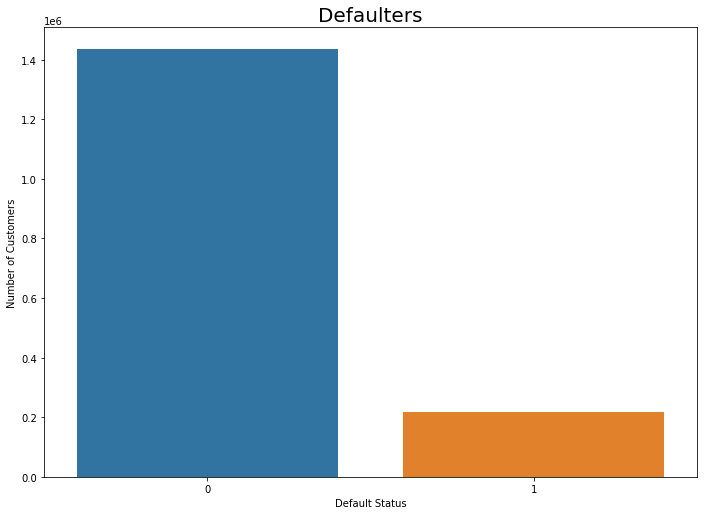

In [22]:
default = data.select('Default').toPandas()

fig, ax = plt.subplots(figsize = a4_dims)

sns.countplot(x = 'Default', data = default)
ax.set_title('Defaulters', fontsize = 20)
ax.set_xlabel('Default Status')
ax.set_ylabel('Number of Customers')

### 1. Loaned and Invested Amount
- Loan Amount
- Funded Amount
- Amount Invested
- Interest Rate

In [23]:
#These numerical features dont have missing values
feat_num.extend(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate'])

data.describe('loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate').show()

+-------+------------------+------------------+------------------+------------------+
|summary|         loan_amnt|       funded_amnt|   funded_amnt_inv|          int_rate|
+-------+------------------+------------------+------------------+------------------+
|  count|           1653015|           1653015|           1653015|           1653015|
|   mean|15399.671070740435|15399.656733302481|15394.442625224641|13.206874450628224|
| stddev| 9233.869566116071| 9233.870799033963| 9231.701568451595| 4.862754063091451|
|    min|              1000|              1000|             725.0|              5.31|
|    max|             40000|             40000|           40000.0|             30.99|
+-------+------------------+------------------+------------------+------------------+



Text(0, 0.5, 'Interest Rate')

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


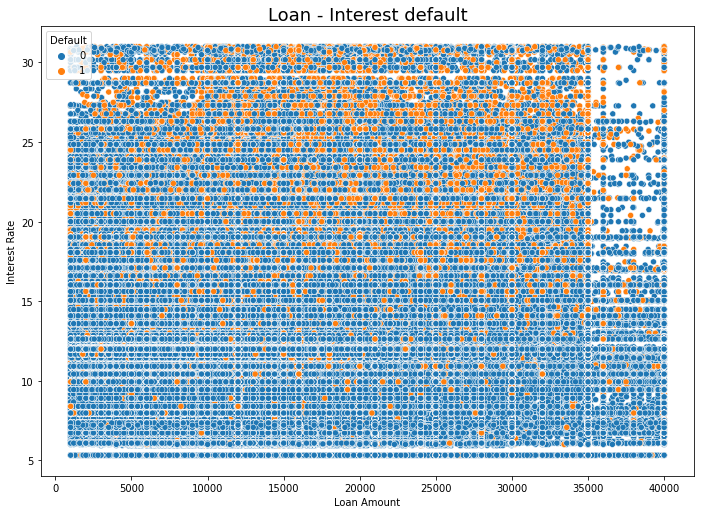

In [24]:
loan = data.select('loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'Default').toPandas()

fig, ax = plt.subplots(figsize = a4_dims)
sns.scatterplot(x= 'loan_amnt', y= 'int_rate', hue='Default', data= loan)
ax.set_title('Loan - Interest default', fontsize = 18)
ax.set_xlabel('Loan Amount')
ax.set_ylabel('Interest Rate')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'Number of Customers')

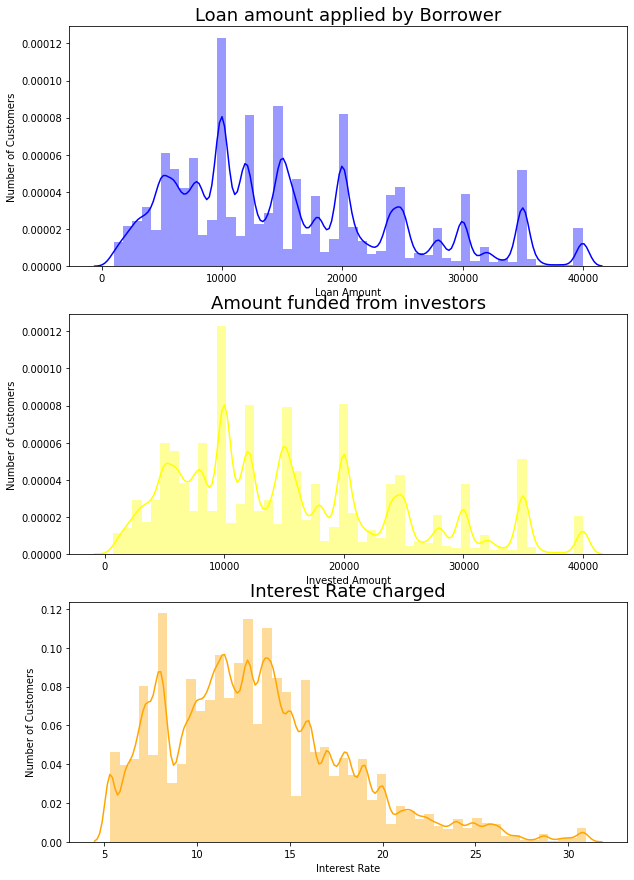

In [25]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10,15))

sns.distplot(loan['loan_amnt'] , color = 'blue', ax = ax[0])
ax[0].set_title('Loan amount applied by Borrower', fontsize = 18)
ax[0].set_xlabel('Loan Amount')
ax[0].set_ylabel('Number of Customers')

sns.distplot(loan['funded_amnt_inv'] , color = 'yellow', ax = ax[1])
ax[1].set_title('Amount funded from investors', fontsize = 18)
ax[1].set_xlabel('Invested Amount')
ax[1].set_ylabel('Number of Customers')

sns.distplot(loan['int_rate'] , color = 'orange', ax = ax[2])
ax[2].set_title('Interest Rate charged', fontsize = 18)
ax[2].set_xlabel('Interest Rate')
ax[2].set_ylabel('Number of Customers')

2. Employment Length
Defining Different employment status levels

In [26]:
data = data.fillna('U', subset=['emp_length'])
df1 = data.where(~df.emp_length.isin([' reactors"']))
df1 = df1.fillna('U', subset = ['emp_length'])
df1 = df1.withColumn("employment_length", F.when((F.col('emp_length') == 'U') ,0).
                     when((F.col('emp_length') == '< 1 year') ,1).
                     when((F.col('emp_length')== '1 year') ,2).
                     when((F.col('emp_length') == '2 years') ,3).
                     when((F.col('emp_length') == '3 years') ,4).
                     when((F.col('emp_length') == '4 years') ,5).
                     when((F.col('emp_length') == '5 years') ,6).
                     when((F.col('emp_length') == '6 years') ,7).
                     when((F.col('emp_length')== '7 years') ,8).
                     when((F.col('emp_length') == '8 years') ,9).
                    when((F.col('emp_length') == '9 years') ,10).otherwise(11))
df1 = df1.drop('emp_length')

feat_cat.append('employment_length')
df1.groupBy(['employment_length']).count().orderBy('employment_length', ascending = True).show(15,  truncate = False)

+-----------------+------+
|employment_length|count |
+-----------------+------+
|1                |138203|
|2                |115288|
|3                |160750|
|4                |142293|
|5                |106952|
|6                |108815|
|7                |80470 |
|8                |73222 |
|9                |72766 |
|10               |62803 |
|11               |591453|
+-----------------+------+



Text(0, 0.5, 'Number of Customers')

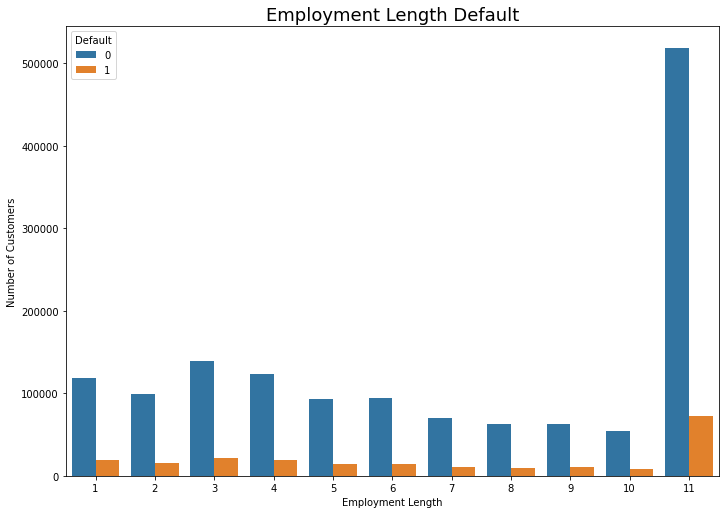

In [27]:
emp = df1.select('employment_length', 'int_rate', 'Default').toPandas()

fig, ax = plt.subplots(figsize = a4_dims)
sns.countplot(x= 'employment_length', hue='Default', data= emp)
ax.set_title('Employment Length Default', fontsize = 18)
ax.set_xlabel('Employment Length')
ax.set_ylabel('Number of Customers')

Text(0, 0.5, 'Interest Rate')

/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


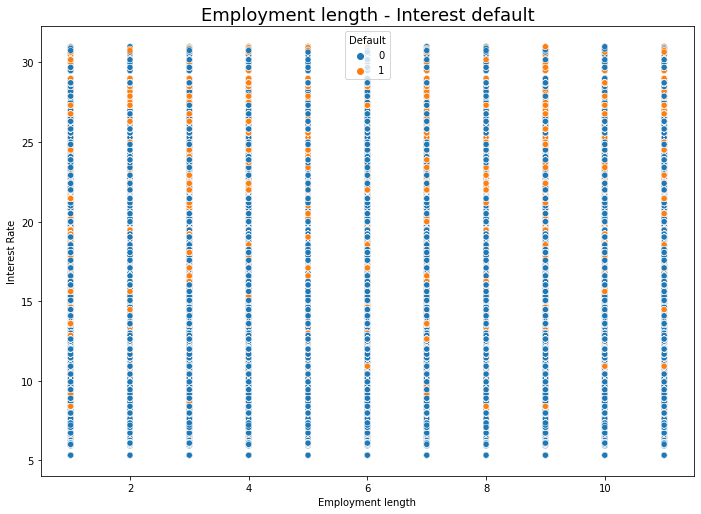

In [28]:
fig, ax = plt.subplots(figsize = a4_dims)
sns.scatterplot(x= 'employment_length', y= 'int_rate', hue='Default', data= emp)
ax.set_title('Employment length - Interest default', fontsize = 18)
ax.set_xlabel('Employment length')
ax.set_ylabel('Interest Rate')

3. Term

In [29]:
df1.groupBy('term').count().show()

+----------+-------+
|      term|  count|
+----------+-------+
| 36 months|1154782|
| 60 months| 498233|
+----------+-------+



In [30]:
feat_cat.append('term')
df1 = df1.withColumn("loan_term", 
   F.when((df1.term == ' 36 months') ,36).otherwise(60))
df1 = df1.drop('term')
df1.groupBy('loan_term').count().show()

+---------+-------+
|loan_term|  count|
+---------+-------+
|       60| 498233|
|       36|1154782|
+---------+-------+



Text(0, 0.5, 'Number of Customers')

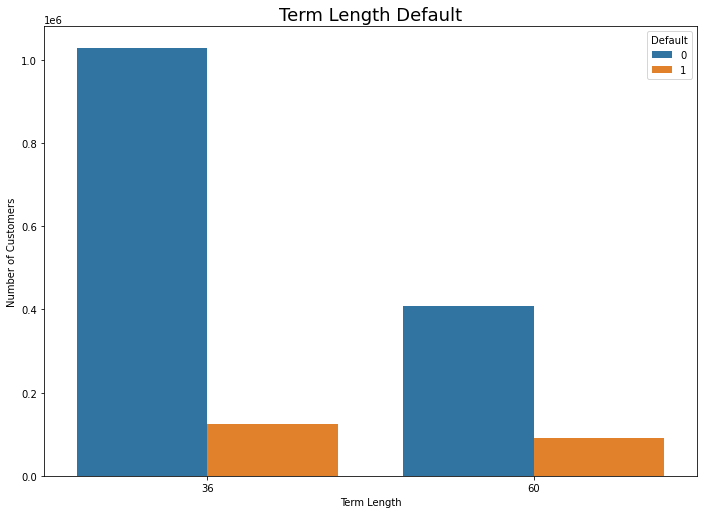

In [32]:
term = df1.select('loan_term', 'int_rate', 'Default').toPandas()


fig, ax = plt.subplots(figsize = a4_dims)
sns.countplot(x= 'loan_term', hue='Default', data= term)
ax.set_title('Term Length Default', fontsize = 18)
ax.set_xlabel('Term Length')
ax.set_ylabel('Number of Customers')

Text(0, 0.5, 'Interest Rates')

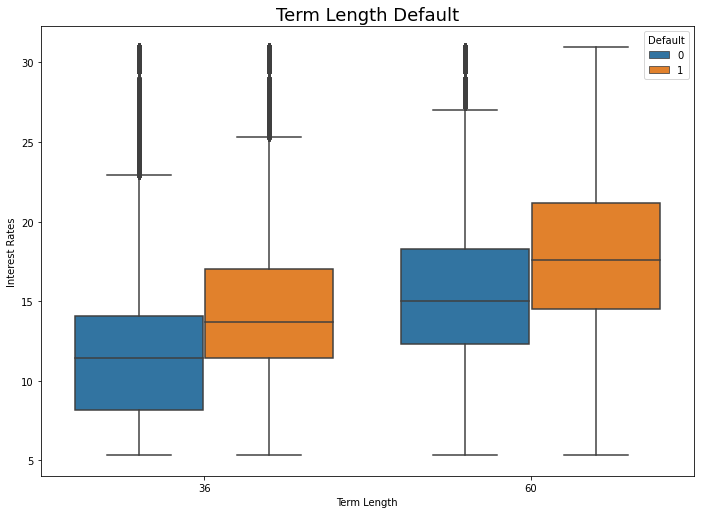

In [33]:
fig, ax = plt.subplots(figsize = a4_dims)
sns.boxplot(x= 'loan_term', y= 'int_rate', hue='Default', data= term)
ax.set_title('Term Length Default', fontsize = 18)
ax.set_xlabel('Term Length')
ax.set_ylabel('Interest Rates')

4. Installments and Annuwal Income

In [34]:
df1.describe('installment').show()

+-------+-----------------+
|summary|      installment|
+-------+-----------------+
|  count|          1653015|
|   mean| 455.300495942262|
| stddev|268.4268246569227|
|    min|             4.93|
|    max|          1719.83|
+-------+-----------------+



In [35]:
feat_num.extend(['installment', 'annual_income'])

In [36]:
df2 = df1.withColumn("income_group", F.when((df1.annual_inc <= 10000) ,'low income').when((df1.annual_inc > 10000) | (df1.annual_inc <= 20000) , 'medium income').otherwise('high income'))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Employment Length')

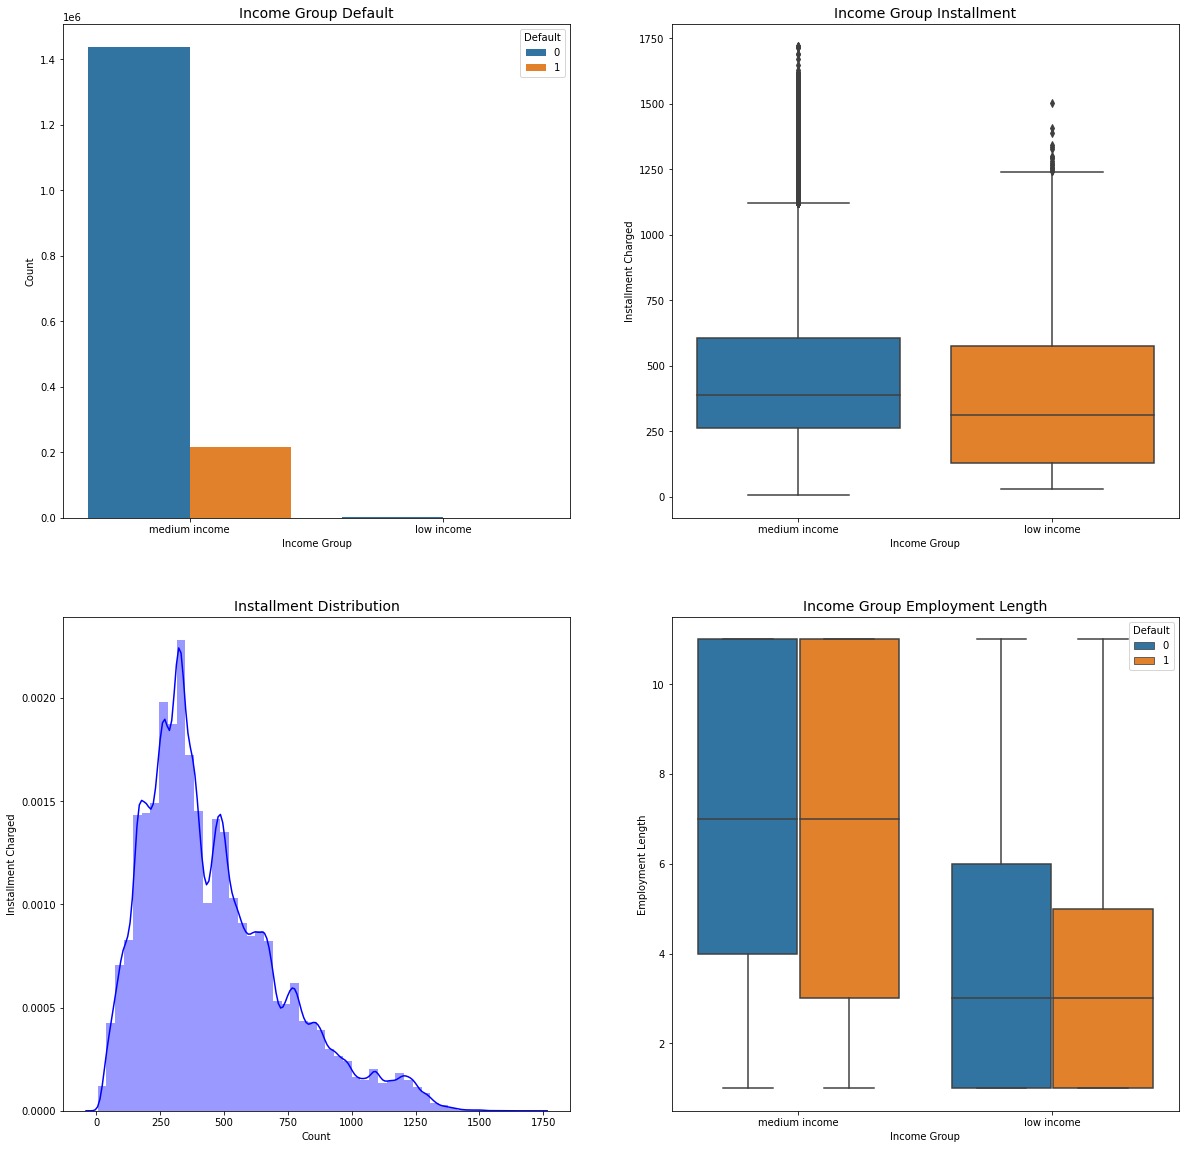

In [37]:
inst = df2.select('installment', 'income_group', 'int_rate', 'employment_length', 'Default').toPandas()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))

sns.countplot(x = 'income_group', hue = 'Default', data = inst, ax = ax1)
sns.boxplot(x= 'income_group', y= 'installment', data= inst, ax = ax2)
sns.distplot(inst['installment'] , color = 'blue', ax = ax3)
sns.boxplot(x= 'income_group', y= 'employment_length',hue = 'Default', data= inst, ax = ax4)

ax1.set_title('Income Group Default', fontsize = 14)
ax1.set_xlabel('Income Group')
ax1.set_ylabel('Count')

ax2.set_title('Income Group Installment', fontsize = 14)
ax2.set_xlabel('Income Group')
ax2.set_ylabel('Installment Charged')

ax3.set_title('Installment Distribution', fontsize = 14)
ax3.set_xlabel('Count')
ax3.set_ylabel('Installment Charged')

ax4.set_title('Income Group Employment Length', fontsize = 14)
ax4.set_xlabel('Income Group')
ax4.set_ylabel('Employment Length')

In [38]:
df2.groupBy('income_group').count().show()

+-------------+-------+
| income_group|  count|
+-------------+-------+
|   low income|    957|
|medium income|1652058|
+-------------+-------+



5. Grade and Subgrade

In [39]:
feat_cat.extend(['grade', 'sub_grade'])
df2.groupBy('grade', 'sub_grade').count().orderBy('sub_grade', ascending = True).show()

+-----+---------+------+
|grade|sub_grade| count|
+-----+---------+------+
|    A|       A1| 59719|
|    A|       A2| 48516|
|    A|       A3| 51384|
|    A|       A4| 67365|
|    A|       A5| 77351|
|    B|       B1| 89948|
|    B|       B2| 91354|
|    B|       B3| 94089|
|    B|       B4|101936|
|    B|       B5|102190|
|    C|       C1|107263|
|    C|       C2| 96050|
|    C|       C3| 96772|
|    C|       C4| 96018|
|    C|       C5| 88978|
|    D|       D1| 60602|
|    D|       D2| 54037|
|    D|       D3| 48248|
|    D|       D4| 42161|
|    D|       D5| 35943|
+-----+---------+------+
only showing top 20 rows



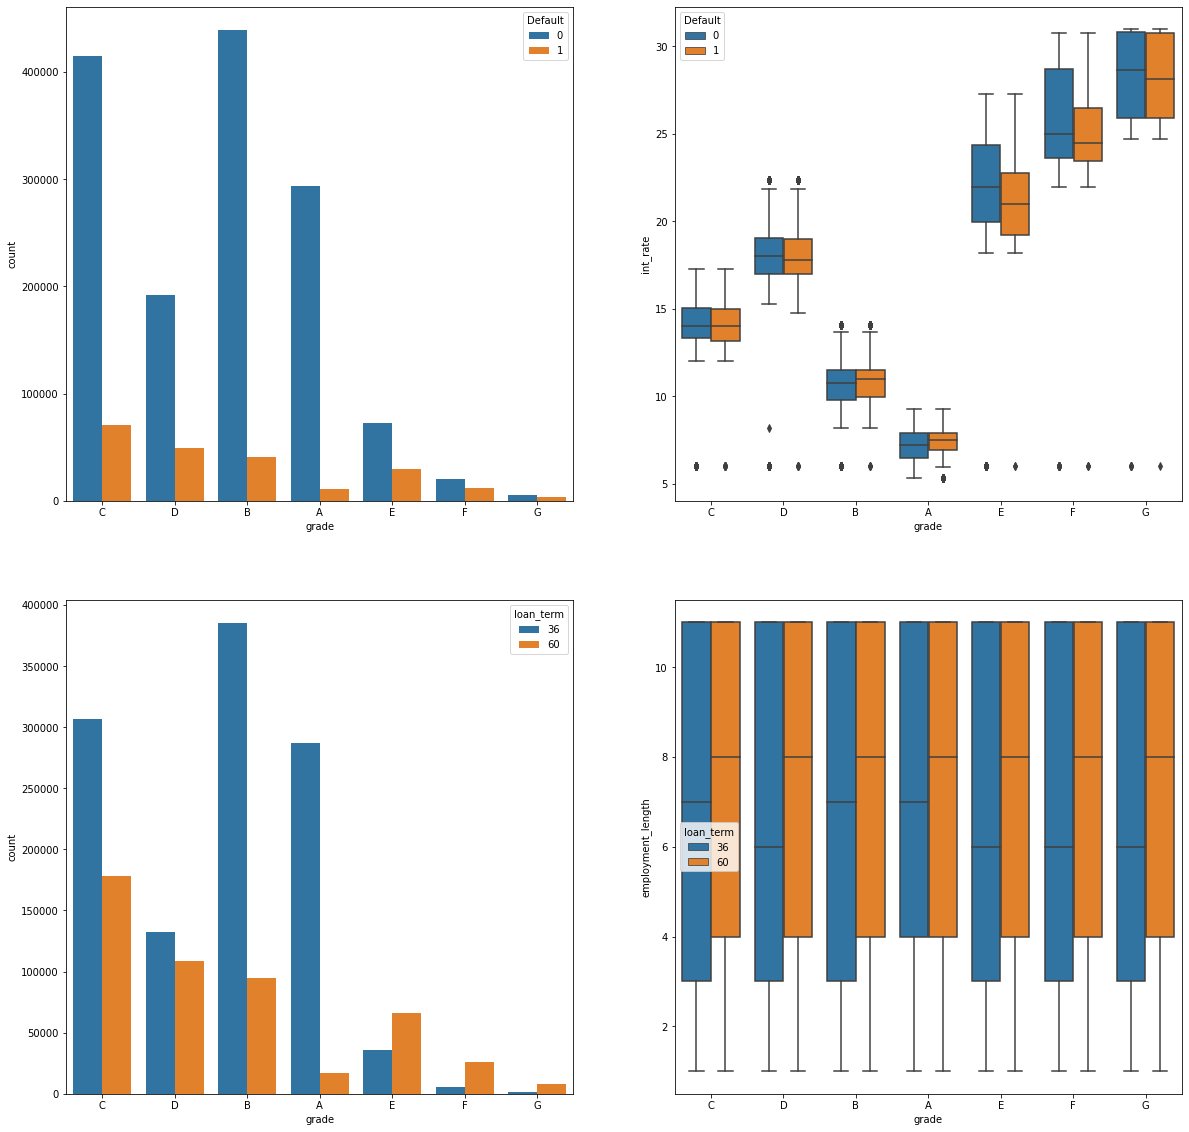

In [ ]:
grade = df2.select('grade', 'int_rate','loan_term', 'employment_length', 'Default').toPandas()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,20))

sns.countplot(x = 'grade', hue = 'Default', data = grade, ax = ax1)
sns.boxplot(x= 'grade', y= 'int_rate', data= grade,hue='Default', ax = ax2)
sns.countplot( x = 'grade', hue = 'loan_term', data = grade, ax = ax3)
sns.boxplot(x= 'grade', y= 'employment_length', hue = 'loan_term', data= grade, ax = ax4)

6. Employment Title

In [ ]:
df1.groupBy(['emp_title']).count().orderBy('count', ascending = False).show(truncate = False)

In [ ]:
df1 = df1.fillna('Unemployed', subset=['emp_title'])
cat_feat.append('emp_title')

7. Home ownership

In [ ]:
df1.groupBy(['home_ownership']).count().orderBy('count', ascending = False).show(truncate = False)

In [ ]:
df2 = df1.withColumn("home_own", 
   F.when((df1.home_ownership == 'ANY') | (df1.home_ownership == 'OTHER') | (df1.home_ownership == 'NONE') ,'ETC').otherwise(df1.home_ownership))
cat_feat.append('home_own')
df2.drop('home_ownership')
df2.groupBy(['home_own']).count().orderBy('count', ascending = False).show(truncate = False)

8. verification_status

In [ ]:
cat_feat.append('verification_status')
df2.groupBy(['verification_status']).count().orderBy('count', ascending = False).show(truncate = False)

9. Issue Date

In [ ]:
df2.groupBy(['issue_d']).count().orderBy('count', ascending = False).show(truncate = False)

In [ ]:
df3 = df2.withColumn('year', df1['issue_d'].substr(5, 4))
df3.groupBy('year').count().orderBy('year', ascending = False).show()

In [ ]:
df3 = df2.withColumn('month', df1['issue_d'].substr(1, 3))
df3.groupBy('month').count().orderBy('month', ascending = False).show()

In [ ]:
df3 = df3.drop('issue_d')
cat_feat.extend(['month', 'year'])

10. Payment_plan

In [ ]:
cat_feat.append('pymnt_plan')
df2.groupBy('pymnt_plan').count().show()

11. Purpose

In [ ]:
purp_list = ['debt_consolidation', 'credit_card', 'home_improvement', 'other', 'major_purchase', 'medical', 'small_buisness', \
             'car', 'vacation', 'moving', 'house', 'wedding', 'renewable_energy', 'educational']

df3 = df3.where(df.emp_length.isin([' reactors"']))

In [ ]:
df3 = df3.drop('purpose')

12. Zipcode

In [ ]:
df3.groupBy('zip_code').count().orderBy('count', asscending = False).show(truncate = True)

In [ ]:
df3 = df3.drop('zip_code')

In [ ]:
us_states = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID', 'AZ', 'TX', 'NM', 'OK', 'GA', 'NC', 'VA', 'FL', 'KY',\
             'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN', 'IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN',\
             'ND','CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

df3 = df2.where(df.addr_state.isin(us_states))
cat_feat.append('addr_state')
df3.groupBy('addr_state').count().orderBy('count', asscending = False).show(truncate = True)

13. crossed 30 day grace period in last 2 years

In [ ]:
df3.groupBy('delinq_2yrs').count().orderBy('delinq_2yrs', asscending = False).show(truncate = True)

In [ ]:
cat_feat.append('delinq_2yrs')

14. Earliest Credit Line


In [ ]:
df3.groupBy('earliest_cr_line').count().orderBy('earliest_cr_line', asscending = False).show(truncate = True)

15. inc last month

In [ ]:
#  |-- earliest_cr_line: string (nullable = true)
#  |-- inq_last_6mths: string (nullable = true)
#  |-- open_acc: string (nullable = true)
#  |-- pub_rec: string (nullable = true)
#  |-- revol_bal: string (nullable = true)
#  |-- revol_util: string (nullable = true)
#  |-- total_acc: string (nullable = true)
#  |-- initial_list_status: string (nullable = true)
#  |-- out_prncp: string (nullable = true)
#  |-- out_prncp_inv: string (nullable = true)
#  |-- total_pymnt: string (nullable = true)
#  |-- total_pymnt_inv: string (nullable = true)
#  |-- total_rec_prncp: string (nullable = true)
#  |-- total_rec_int: string (nullable = true)
#  |-- total_rec_late_fee: string (nullable = true)
#  |-- recoveries: string (nullable = true)
#  |-- collection_recovery_fee: string (nullable = true)